# Assignment05-Q.01

## Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Multi Linear Regression/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### No Null Values

In [ ]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MRS'},axis=1)
df1

,RDS,ADS,MRS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df1[df1.duplicated()]

,RDS,ADS,MRS,State,Profit


### No Duplicate values in dataset.

In [ ]:
df1.describe()

,RDS,ADS,MRS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Let's find out Correlation.

In [ ]:
df1.corr()

,RDS,ADS,MRS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADS,0.241955,1.000000,-0.032154,0.200717
MRS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


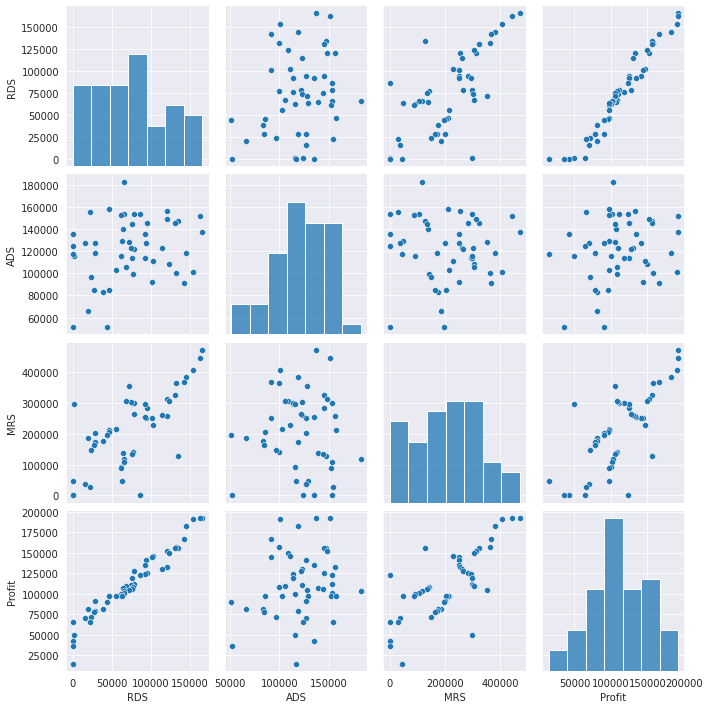

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

## Model Building & Testing.

In [ ]:
model1=smf.ols("Profit~RDS+ADS+MRS",data=df1).fit()
model1.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MRS              0.027228
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        16:29:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is collinearity problem in 'ADS' & 'MRS' because P_value is greater than alpha (0.05). But R^2 value is good(0.951).

Prepare for simple linear regression model between 'ADS' & 'MRS'. For insignificant variables.

In [ ]:
model1_values=(model1.rsquared,model1.rsquared_adj,model1.aic)
model1_values

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

In [ ]:
ADS_md=smf.ols("Profit~ADS",data=df1).fit()
ADS_md.tvalues , ADS_md.pvalues

(Intercept    3.040044
 ADS          1.419493
 dtype: float64, Intercept    0.003824
 ADS          0.162217
 dtype: float64)

### ADS_md have insgnificant p_value

In [ ]:
MRS_md=smf.ols("Profit~MRS",data=df1).fit()
MRS_md.tvalues , MRS_md.pvalues

(Intercept    7.808356
 MRS          7.802657
 dtype: float64, Intercept    4.294735e-10
 MRS          4.381073e-10
 dtype: float64)

### MRS_md have sgnificant p_value

In [1]:
AD_MR_md=smf.ols("Profit~ADS+MRS",data=df1).fit()

NameError: ignored

In [ ]:
AD_MR_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        16:48:32   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADS            0.3237      0.131      2.468      0.017       0.060       0.588
MRS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vriables have significant p_value

## MODEL VALIDATION

#### Dection of colinearity - VIF --> Variance Inflation Factor

In [ ]:
rsq_r=smf.ols("RDS~ADS+MRS",data=df1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols("ADS~RDS+MRS",data=df1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols("MRS~RDS+ADS",data=df1).fit().rsquared
vif_m=1/(1-rsq_m)

In [ ]:
# Create a Dataframe format
d1={'Variables':['RDS','ADS','MRS'],'Vif':[vif_r,vif_a,vif_m]}
VIF=pd.DataFrame(d1)
VIF

,Variables,Vif
0,RDS,2.468903
1,ADS,1.175091
2,MRS,2.326773


### All VIF values are less than 10 or 20. so No collinearity. 

## Residual analysis

### Test for Normality of Residuals (Q-Q Plot) using residual model.

In [ ]:
import statsmodels.api as sm
res=model1.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [ ]:
res.mean()

-8.149072527885438e-12

#### If residual mean = 0. means 0 errors or outliers.

<function matplotlib.pyplot.show>

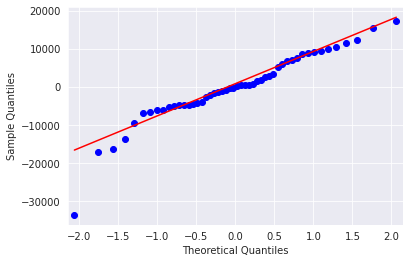

In [ ]:
qqplot=sm.qqplot(res,line='q')
plt.title
plt.show

In [ ]:
list(np.where(model1.resid<-15000))

[array([14, 15, 49])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values(vals): return(vals-vals.mean()/vals.std())

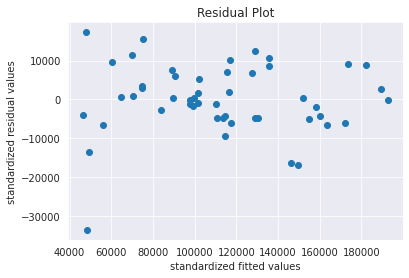

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Model Deletion Diagnostics

### Detection of Outlier Cook's distance plot

In [ ]:
(c,_)=model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

# Plot the influencers using the stem plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


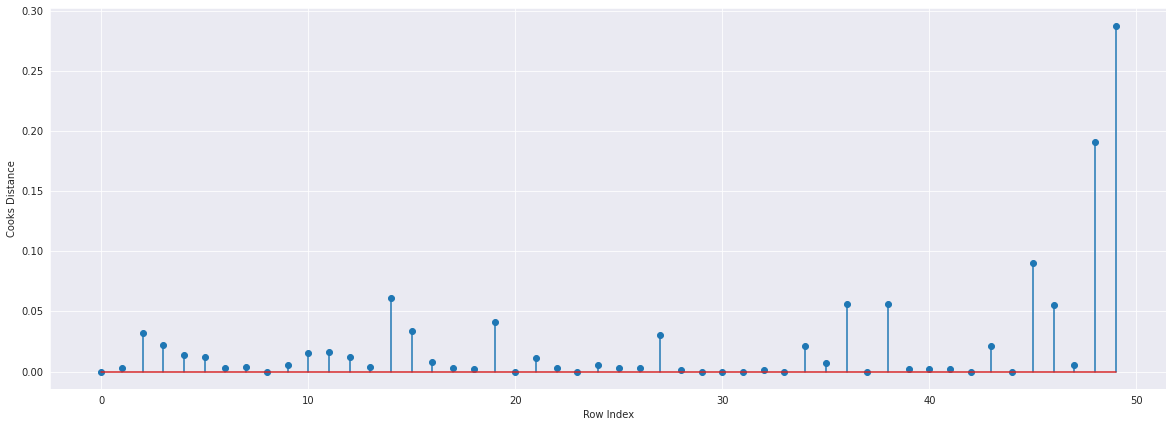

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
## Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

# High Influence points

## Leverage Plot

### Alternate method for cook's distance plot

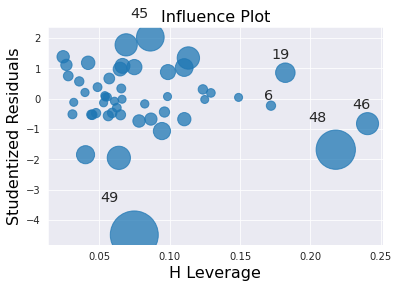

In [ ]:
influence_plot(model1)
plt.show()

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [ ]:
df1[df1.index.isin([48,49])] # 48 & 49 are the influencers

,RDS,ADS,MRS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model
### drop the influencers


In [ ]:
NW_df=df1.drop(df1.index[[49,48]],axis=0).reset_index()
NW_df.tail()

,index,RDS,ADS,MRS,State,Profit
43,43,15505.73,127382.30,35534.17,New York,69758.98
44,44,22177.74,154806.14,28334.72,California,65200.33
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,46,1315.46,115816.21,297114.46,Florida,49490.75
47,47,0.00,135426.92,0.00,California,42559.73


In [ ]:
df2=NW_df.drop(['index'],axis=1)
df2.tail()

,RDS,ADS,MRS,State,Profit
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73


# Buliding Reggresioin model after removing most influencing DataPoint (model2)


In [ ]:
model2=smf.ols('Profit~RDS+ADS+MRS',data=df2).fit()
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

# Again check for influencers

In [ ]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

# Plot the influencers values using stem plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


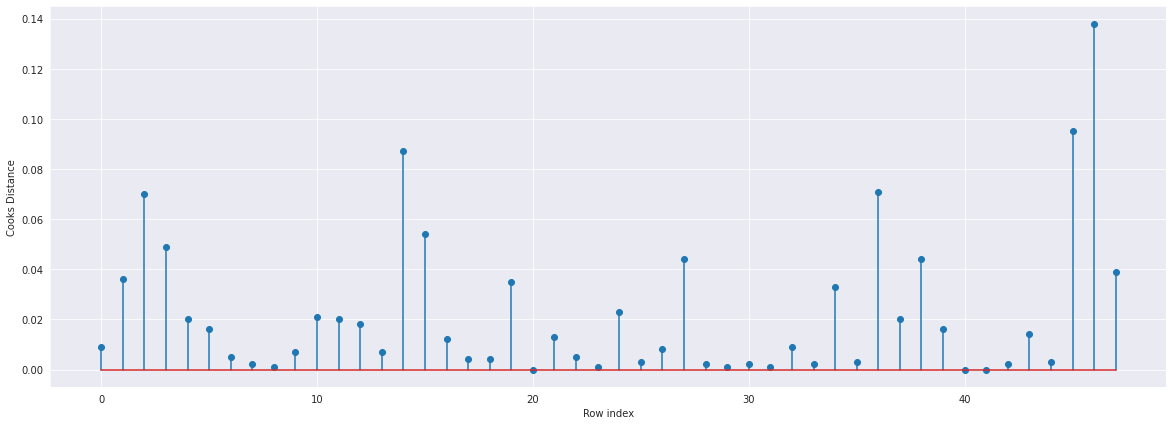

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Influensing Data point
(np.argmax(c),np.max(c))

(46, 0.13829133994334422)

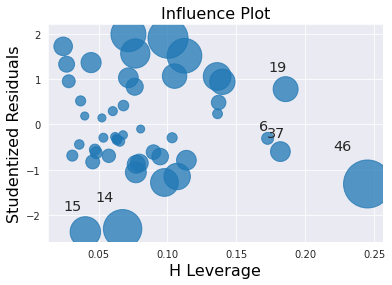

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [ ]:
# Droping the influensing DataPoint

NW1_df=df2.drop(df2.index[[46]],axis=0).reset_index()
NW1_df.tail()

,index,RDS,ADS,MRS,State,Profit
42,42,23640.93,96189.63,148001.11,California,71498.49
43,43,15505.73,127382.30,35534.17,New York,69758.98
44,44,22177.74,154806.14,28334.72,California,65200.33
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,47,0.00,135426.92,0.00,California,42559.73


In [ ]:
df3=NW_df.drop(['index'],axis=1)
df3.tail()

,RDS,ADS,MRS,State,Profit
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73


# Buliding Reggresioin model after removing most influencing DataPoint (model3)

In [ ]:
model3=smf.ols('Profit~RDS+ADS+MRS',data=df3).fit()
model3_values=(model3.rsquared,model3.rsquared_adj,model3.aic)
model3_values

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [ ]:
model_values_df=pd.DataFrame({'model 1':model1_values,'model 2':model2_values,'Final Model':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

,model 1,model 2,Final Model
rsquared,0.950746,0.962677,0.962677
rsquared_adj,0.947534,0.960132,0.960132
AIC,1058.771499,994.669044,994.669044


# Model Prediction

## Predict For New Data

In [ ]:
new_data1=pd.DataFrame({'RDS':34000,"ADS":134000,"MRS":97500},index=[0])
new_data1

,RDS,ADS,MRS
0,34000,134000,97500


In [ ]:
model3.predict(new_data1)

0    79099.812948
dtype: float64

In [ ]:
# prediction for all data set

model3.predict(df3)

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

# R^2 value table of each model

In [ ]:
d2={'Prep_Models':['model1','model2','model3'],'Rsquared':[model1.rsquared, model2.rsquared,model3.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model1,0.950746
1,model2,0.962677
2,model3,0.962677
